## Exploring a MapManager map with widgets

This notebook requires the following installs

    # install ipywidgets python code
    conda install -c conda-forge ipywidgets
    
    # enable widgets in your jupyter notebooks
    jupyter nbextension enable --py --sys-prefix widgetsnbextension
    



### Load a map

In [1]:
# load a map
from pymapmanager.mmMap import mmMap
filePath = '/Users/cudmore/Desktop/data/cudmore/rr30a/rr30a.txt'
m = mmMap(filePath=filePath)

map rr30a loaded in 0.38 seconds.


### Dynamically browse a stack value across all stacksin a map.

<IPython.core.display.Javascript object>


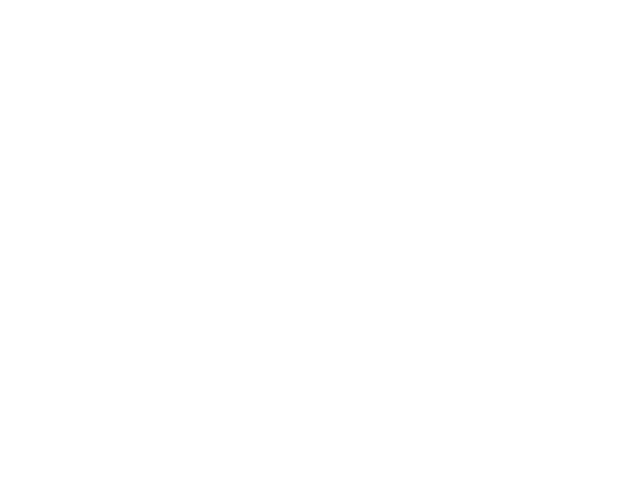

<function __main__.f>

In [7]:
from ipywidgets import interact
import ipywidgets as widgets

%matplotlib notebook
import matplotlib.pyplot as plt

mySegmentID = [] # all segments in each stack
myXStat = 'pDist' # change these to (pDist, mapSessions)
myYStat = 'ubssSum_int2'

#make initial x/y plot
x = m.stacks[0].getStackValues2(myXStat, roiType=['spineROI'], segmentID=mySegmentID)
y = m.stacks[0].getStackValues2(myYStat, roiType=['spineROI'], segmentID=mySegmentID)

plt.figure()
linePlot = plt.plot(x, y, 'o')[0] # show initial plot
plt.show()

def f(x):
    # update the plot for session x
    linePlot.set_xdata(m.stacks[x].getStackValues2(myXStat, segmentID=mySegmentID))
    linePlot.set_ydata(m.stacks[x].getStackValues2(myYStat, segmentID=mySegmentID))
    plt.draw()
    return x

# make a slider with values [0 .. numSessions-1]
numSessions = m.numSessions
myIntSlider = widgets.IntSlider(min=0, max=numSessions-1, step=1, value=0, description='Sessions')

interact(f, x=myIntSlider)


### Browse all images in a stack

mmStack.loadStack() loaded map session 0 channel 2 in 0.12 seconds.


<IPython.core.display.Javascript object>


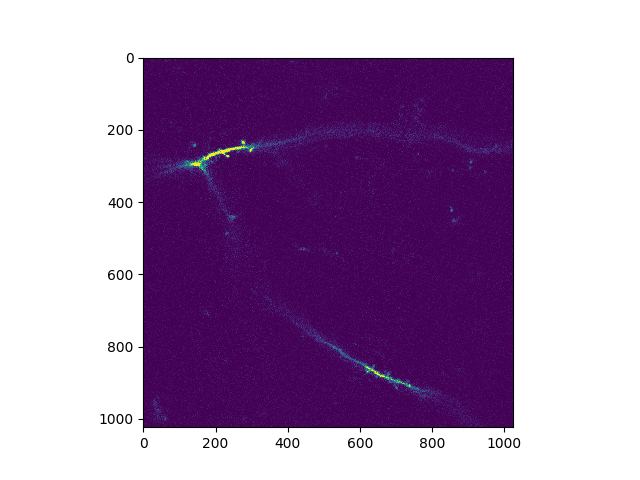

<function __main__.f>

In [8]:
# clear global from previous cell
plt.clf()

myStackIdx = 0

# load the stack images
m.stacks[myStackIdx].loadStackImages(channel=2)

# grab all the images in the stack, this is a 3D numpy ndarray
images = m.stacks[myStackIdx].images # all images in stack, image 0 is images[0,:,:]

# show the first image (slice 0)
plt.figure()
imgplot = plt.imshow(images[0,:,:]) # show initial plot
plt.show()

def f(x):
    # update the plot for slice x
    imgplot.set_data(images[x,:,:])
    plt.draw()
    return x

# make a slider with values [0 .. numSlices-1]
numSlices = images.shape[0]
myIntSlider = widgets.IntSlider(min=0, max=numSlices-1, step=1, value=0, description='Slice')

interact(f, x=myIntSlider)

